# Исследование функции
$
f(x) = -12x^4 * sin(cos(x)) - 18x^3 + 5x^2 + 10x - 30
$

In [536]:
import matplotlib
# %matplotlib inline
import matplotlib.pyplot as plt
import sympy
from sympy.plotting import plot
sympy.init_printing()

FIG_SIZE = (11, 6)


Функция представляет собой сумму как элементарных функций: линейной $(10x-30)$ и двух степенных, квадратичной $(5x^2)$ и кубической $(-18x^3)$, так и сложной функции, являющейся произведением степенной функции 4-го порядка $(-12x^4)$ и тригонометрической функции $(sin(cos(x)))$ с периодом $2\pi$.

Таким образом, фунция является комбинацией из периодической, чётных и нечётных функций, и, следовательно сама является ни чётной, ни нечётной, а представляет собой ***нелинейную функцию общего вида***.

Поскольку указанные элементарные функции являются непрерывными и определёнными на всём диапазоне вещественных значений, а произведение и сумма непрырывных функций в свою очередь является неприрывной функцией, то и заданная фунция также ***неприрывна и определена на всём диапазоне*** $ x\in(-\infty, +\infty) $.

Зная поведение отдельных составляющих элементарных функций, можно заметить, что для всех значений $x: \left|x\right|>1$ наибольший вклад в поведение исходной функции оказывает член, являющийся произведением степенной функции 4-го порядка и тригонометрической функции. При этом, значения степенной функции $(-12x^4)$ стремятся к $-\infty$ при $x\rightarrow\pm\infty$ (бесконечно убывающая функция), в то время как множитель $sin(cos(x))$ является периодической функцией (синусоидой) с периодом $2\pi$ и амплитудой $sin(1)$.

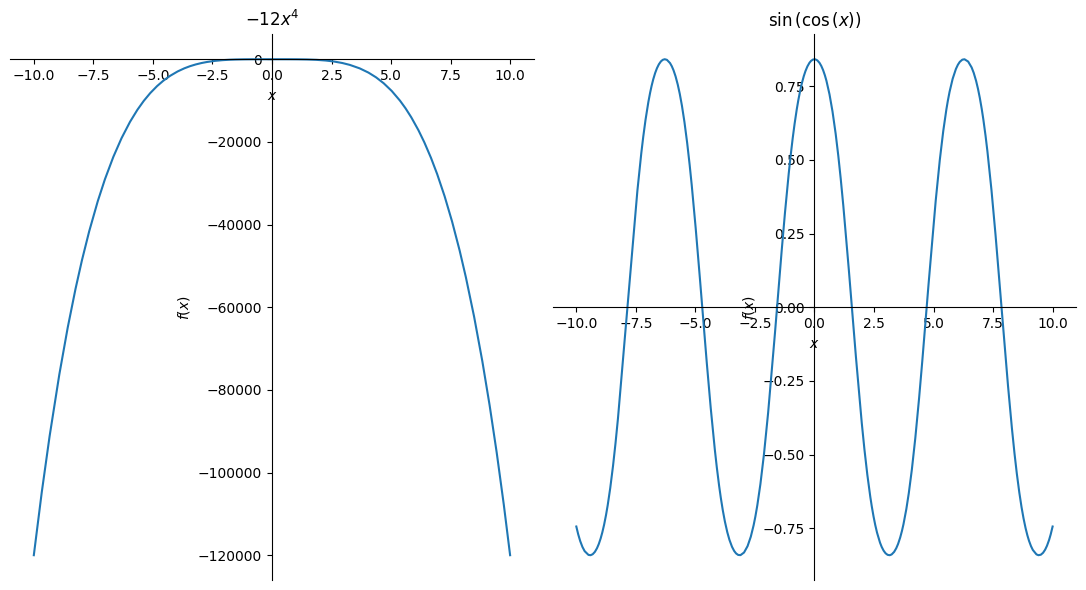

In [537]:
from sympy.plotting import PlotGrid
plt.rcParams['figure.figsize'] = FIG_SIZE

x = sympy.symbols('x')
f_pow = -12*x**4
f_trig = sympy.sin(sympy.cos(x))

r = (x, -10, 10)
p_pow = plot(f_pow, r, show=False, title=f'${sympy.latex(f_pow)}$')
p_trig = plot(f_trig, r, show=False, title=f'${sympy.latex(f_trig)}$')
PlotGrid(1, 2, p_pow, p_trig)
pass


Очевидно, что результатом их произведения будет функция, представляющая ***гармонические колебания с бесконечно нарастающей амплитудой***.

Следовательно заданная функция заведомо ***не имеет конечного экстремума (вершины)*** и, кроме того, пересекает ось абсцисс координатной плоскости $xy$ бесконечное число раз. То есть уравнение $-12x^4 * sin(cos(x)) - 18x^3 + 5x^2 + 10x - 30 = 0$ имеет ***бесконечное число корней***.

Построим график заданной функции в некотором интервале, чтобы убедиться в этом:

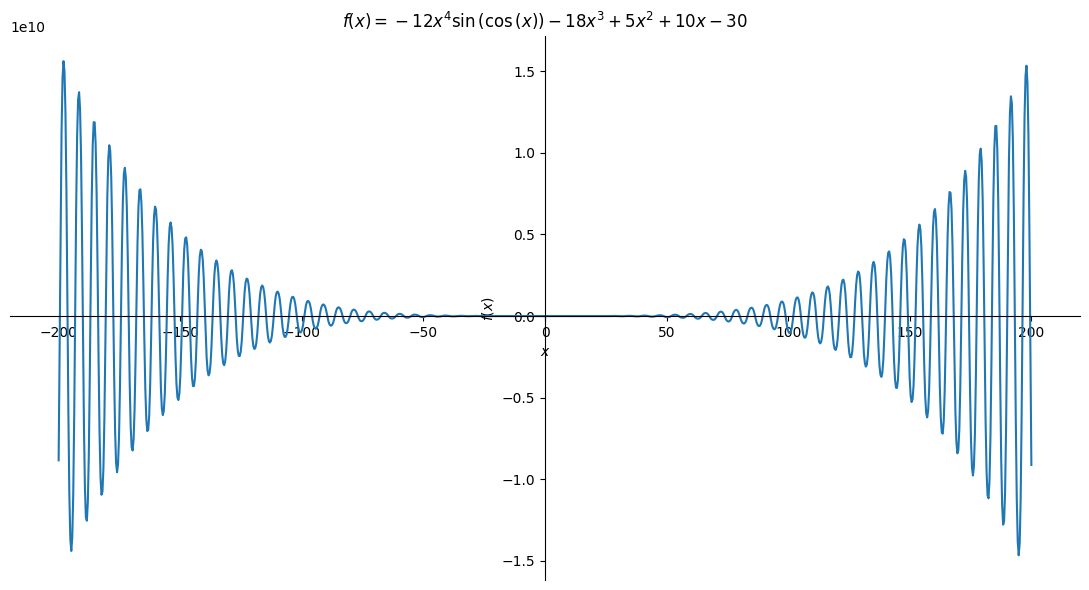

In [538]:
x = sympy.symbols('x')
f = -12*x**4 * sympy.sin(sympy.cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30
plot(f, (x, -200, 200), adaptive=False, nb_of_points=1000,
     title=f'$f(x) = {sympy.latex(f)}$')
f


In [539]:
sympy.solveset(f, x, domain=sympy.S.Reals)


⎧  │         ⎛      4                   3      2                ⎞⎫
⎨x │ x ∊ ℝ ∧ ⎝- 12⋅x ⋅sin(cos(x)) - 18⋅x  + 5⋅x  + 10⋅x - 30 = 0⎠⎬
⎩  │                                                             ⎭

График функции в окрестности начала координатной плоскости:

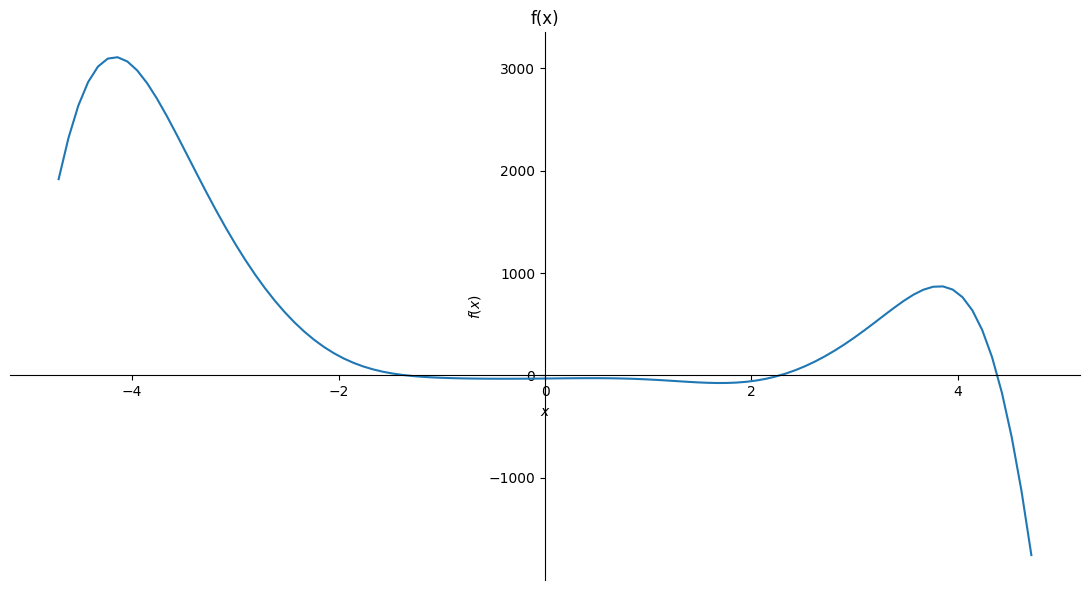

In [540]:
plot(f, (x, -sympy.pi*1.5, sympy.pi*1.5),
     adaptive=False, nb_of_points=100, title='f(x)')
pass


## Исследование функции на конечном интервале значений $x\in[a, b]$ с использованием численных методов

Учитывая указанные свойства заданной функции, дальнейшее её иследование представляется возможным только для некоторого конечного интервала занчений $x$.

Заметим также тот факт, что нули заданной функции отстоят друг от друга на шаг, не превышающий некоторого конечного числа. Как видно из графика вблизи оси координат, где расположение нулей функции наиболее плотное, расстояние между ними тем не менее всюду не меньше $\pi/2$, что можно использовать в целях оптимизации при поиске множества нулей функции на конечном отрезке.

### Нули функции (корни)

Для поиска приблизительных значений нулей функции (корней) будем использовать классический численный метод Брента.


In [541]:
import numpy as np
from scipy.optimize import brentq

a = 0
b = 47

resolution = np.pi / 2

f_py = sympy.lambdify(x, f, ['scipy', 'numpy'])


def roots(func, start, end, step):
    sub_start = start
    while sub_start < end:
        l_val = 0
        r_val = 0
        sub_end = sub_start
        while sub_end <= end and l_val * r_val >= 0:
            sub_start = sub_end
            l_val = func(sub_start)
            sub_end = sub_start + step
            r_val = func(sub_end)
        if l_val * r_val >= 0:
            return
        try:
            root = brentq(func, sub_start, sub_end, rtol=0.001, maxiter=10000)
            if root > end:
                return
        except Exception:
            print(sub_start, sub_end)
            print(l_val, r_val)
            print(root)
        sub_start = root + step/2
        yield root


roots_gen = roots(f_py, a, b, resolution)
found_roots_within_ab = list(roots_gen)

print(
    f'В дианазоне x \u2208 [{a}, {b}] найдено {len(found_roots_within_ab)} нулей функции.')
print('Нули функции (корни):')
print(found_roots_within_ab)


В дианазоне x ∈ [0, 47] найдено 15 нулей функции.
Нули функции (корни):
[2.273018103232806, 4.382625495076655, 8.036431543645465, 10.862932201849803, 14.240831396572272, 17.191705813472936, 20.49513599147388, 23.498376546042213, 26.764654951953347, 29.795021898582114, 33.03834716120921, 36.081733968458565, 39.31458035056583, 42.365822232881484, 45.59252776157253]


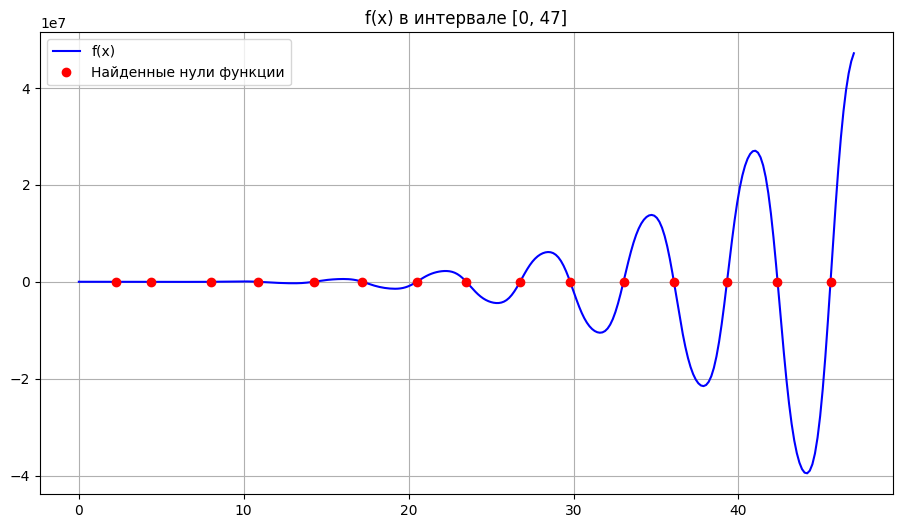

In [542]:
xs = np.linspace(a, b, 300)
# plot(f, (x, a, b), adaptive=False, nb_of_points=300, title=f'f(x) в интервале [{a}, {b}]')
plt.figure(figsize=FIG_SIZE)
plt.title(f'f(x) в интервале [{a}, {b}]')
plt.xlabel = 'x'
plt.ylabel = 'f(x)'
plt.grid()
plt.plot(xs, f_py(xs), 'b', label='f(x)')
plt.plot(found_roots_within_ab, [
         0]*len(found_roots_within_ab), 'ro', label='Найденные нули функции')
plt.legend()
pass


Оценим поведение расстояния между соседними нулями функции с увеличением $x$:

In [543]:
mid_idx = len(found_roots_within_ab)//2
distance_close = found_roots_within_ab[mid_idx +
                                       1] - found_roots_within_ab[mid_idx]
distance_far = found_roots_within_ab[-1] - found_roots_within_ab[-2]


In [544]:
print(f'Расстояние ближе к началу координат: {distance_close:.5f}')
print(f'Расстояние дальше от начала координат: {distance_far:.5f}')


Расстояние ближе к началу координат: 3.26628
Расстояние дальше от начала координат: 3.22671


*Вывод:* расстояние между соседними нулями функции растёт с удалением от начала координат.

### Локальные экстремумы функции и интервалы монотонности

Для исследования локальных экстремумов и интервалов монотонности найдем первую производную заданной функции:

In [545]:
df = sympy.diff(f)
df


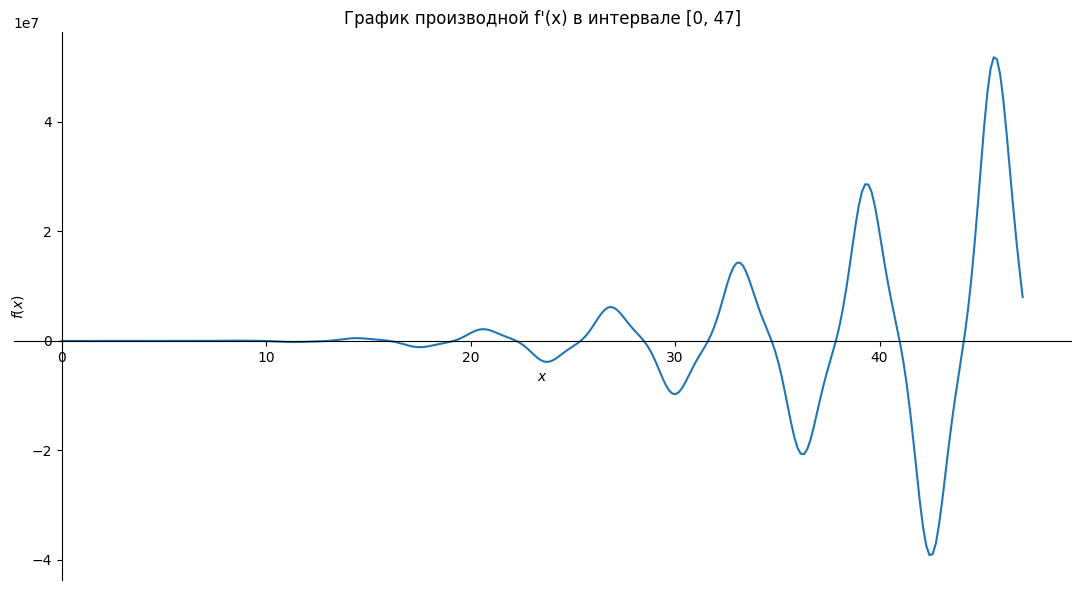

In [546]:
plot(df, (x, a, b), adaptive=False, nb_of_points=300,
     title=f'График производной f\'(x) в интервале [{a}, {b}]')
pass


Первая производаная заданной функции также является нелинейной функцией общего вида, непрерывной и определённой на всём диапазоне вещественных чисел.

Нули первой производной соостветствуют локальным экстремумам исходной функции, а по знаку первой производной в любом интервале между её соседними нулями можно судить о том монотонно убывает или возрастает функция на данном интервале.

In [547]:
print(df)


12*x**4*sin(x)*cos(cos(x)) - 48*x**3*sin(cos(x)) - 54*x**2 + 10*x + 10


In [548]:
# def df_py(x):
#     return 12*x**4*np.sin(x)*np.cos(np.cos(x)) - 48*x**3*np.sin(np.cos(x)) - 54*x**2 + 10*x + 10

df_py = sympy.lambdify(x, df, ['scipy', 'numpy'])
df_roots_gen = roots(df_py, a, b, resolution/10)
df_roots = list(df_roots_gen)

print('Абсциссы локальных экстремумов функции:', df_roots)


Абсциссы локальных экстремумов функции: [0.45447102516423354, 1.7007591016459103, 3.818782615637176, 7.000898431184307, 9.878441208327752, 13.01401401121507, 16.027659312218322, 19.16326093008604, 22.238598354139725, 25.37397280712989, 28.47276803030917, 31.61104188991268, 34.723051575611535, 37.86255753058275, 40.98260953112288, 44.122750108135655]


In [549]:
# xs = np.array(df_roots)
# ys = df_py(xs)

In [550]:
def get_intervals(dfunc, start: float, end: float, in_between: list[float]):
    rising_intervals = []
    falling_intervals = []
    left_x = start
    for right_x in in_between + [end]:
        interval = (left_x, right_x)
        mid_x = (left_x + right_x)/2
        if dfunc(mid_x) > 0:
            rising_intervals.append(interval)
        else:
            falling_intervals.append(interval)
        left_x = right_x
    return rising_intervals, falling_intervals


In [551]:
rising_intervals, falling_intervals = get_intervals(df_py, a, b, df_roots)

In [552]:
print(f'На заданном отрезке [{a}, {b}] функция имеет:')
print('Итервалы возрастания:', rising_intervals)
print('Итервалы убывания:', falling_intervals)

На заданном отрезке [0, 47] функция имеет:
Итервалы возрастания: [(0, 0.45447102516423354), (1.7007591016459103, 3.818782615637176), (7.000898431184307, 9.878441208327752), (13.01401401121507, 16.027659312218322), (19.16326093008604, 22.238598354139725), (25.37397280712989, 28.47276803030917), (31.61104188991268, 34.723051575611535), (37.86255753058275, 40.98260953112288), (44.122750108135655, 47)]
Итервалы убывания: [(0.45447102516423354, 1.7007591016459103), (3.818782615637176, 7.000898431184307), (9.878441208327752, 13.01401401121507), (16.027659312218322, 19.16326093008604), (22.238598354139725, 25.37397280712989), (28.47276803030917, 31.61104188991268), (34.723051575611535, 37.86255753058275), (40.98260953112288, 44.122750108135655)]


In [553]:
res = 50
risings = [np.linspace(lx, rx, res) for lx, rx in rising_intervals]
fallings = [np.linspace(lx, rx, res) for lx, rx in falling_intervals]

local_highs = np.array([rx for _, rx in rising_intervals if rx != b])
local_lows = np.array([rx for _, rx in falling_intervals if rx != b])
local_lows


array([ 1.7007591 ,  7.00089843, 13.01401401, 19.16326093, 25.37397281,
       31.61104189, 37.86255753, 44.12275011])

#### Построим график функции, обозначив цветами интервалы монотонности и локальные экстремумы:

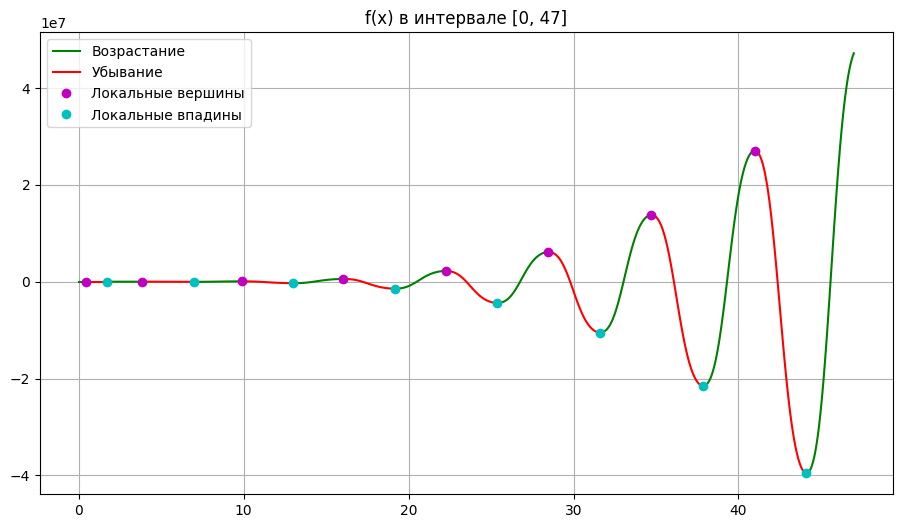

In [554]:
plt.figure(figsize=FIG_SIZE)
plt.title(f'f(x) в интервале [{a}, {b}]')
plt.xlabel = 'x'
plt.ylabel = 'f(x)'
plt.grid()

lbl = 'Возрастание'
for ris_int in risings:
    plt.plot(ris_int, f_py(ris_int), 'g', label=lbl)
    lbl = None

lbl = 'Убывание'
for fal_int in fallings:
    plt.plot(fal_int, f_py(fal_int), 'r', label=lbl)
    lbl = None

plt.plot(local_highs, f_py(local_highs), 'mo', label='Локальные вершины')
plt.plot(local_lows, f_py(local_lows), 'co', label='Локальные впадины')
plt.legend()
pass